In [4]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

folder1_path = "/data1/home/mukeshram/covid_detection/covid"
folder2_path = "/data1/home/mukeshram/covid_detection/normal"
folder3_path = "/data1/home/mukeshram/covid_detection/virus"

image_size = (264, 264)

data = []
labels = []


def one_hot(data):
    a= list(set(data))
    ohe = np.zeros((len(data),len(set(data))))
    for i in range(len(data)):
        ind = a.index(data[i])
        ohe[i][ind] = 1
    
    return ohe



for filename in os.listdir(folder1_path):
    img = cv2.imread(os.path.join(folder1_path, filename))
    if img is not None:
        img = cv2.resize(img, image_size) if image_size else img
        data.append(img)
        labels.append(0)  

for filename in os.listdir(folder2_path):
    img = cv2.imread(os.path.join(folder2_path, filename))
    if img is not None:
        img = cv2.resize(img, image_size) if image_size else img
        data.append(img)
        labels.append(1)  

for filename in os.listdir(folder3_path):
    img = cv2.imread(os.path.join(folder3_path, filename))
    if img is not None:
        img = cv2.resize(img, image_size) if image_size else img
        data.append(img)
        labels.append(2)

data = np.array(data)
labels = one_hot(labels)
labels = np.array(labels)
data = data/255.0

train_data, r_data, train_labels, r_labels = train_test_split(data, labels, test_size=0.3, random_state=42)
val_data, test_data, val_labels, test_labels = train_test_split(r_data, r_labels, test_size=0.5, random_state=42)


# Print the shapes of the resulting datasets
print("Training data shape:", train_data.shape)
print("Training labels shape:", train_labels.shape)
print("val data shape:", val_data.shape)
print("val labels shape:", val_labels.shape)
print("Test data shape:", test_data.shape)
print("Test labels shape:", test_labels.shape)


Training data shape: (1276, 264, 264, 3)
Training labels shape: (1276, 3)
val data shape: (273, 264, 264, 3)
val labels shape: (273, 3)
Test data shape: (274, 264, 264, 3)
Test labels shape: (274, 3)


In [5]:
labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [6]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping


# Define the CNN model architecture
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(264,264, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Assuming 3 classes
])

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)



In [8]:
history = model.fit(train_data, train_labels, epochs=50, batch_size=32, validation_data=(val_data,val_labels), callbacks=[early_stopping])




Epoch 1/50
40/40 [==============================] - 43s 1s/step - loss: 1.2032 - accuracy: 0.6708 - val_loss: 0.4366 - val_accuracy: 0.8278
Epoch 2/50
40/40 [==============================] - 42s 1s/step - loss: 0.2762 - accuracy: 0.9099 - val_loss: 0.3061 - val_accuracy: 0.8938
Epoch 3/50
40/40 [==============================] - 42s 1s/step - loss: 0.1570 - accuracy: 0.9491 - val_loss: 0.2333 - val_accuracy: 0.9084
Epoch 4/50
40/40 [==============================] - 42s 1s/step - loss: 0.1238 - accuracy: 0.9553 - val_loss: 0.2790 - val_accuracy: 0.9267
Epoch 5/50
40/40 [==============================] - 42s 1s/step - loss: 0.0913 - accuracy: 0.9632 - val_loss: 0.2449 - val_accuracy: 0.9121
Epoch 6/50
40/40 [==============================] - 42s 1s/step - loss: 0.0603 - accuracy: 0.9765 - val_loss: 0.2178 - val_accuracy: 0.9304
Epoch 7/50
40/40 [==============================] - 41s 1s/step - loss: 0.0209 - accuracy: 0.9945 - val_loss: 0.2615 - val_accuracy: 0.9267
Epoch 8/50
40/40 [==

In [9]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)


9/9 [==============================] - 1s 156ms/step - loss: 0.4172 - accuracy: 0.9307
Test accuracy: 0.930656909942627


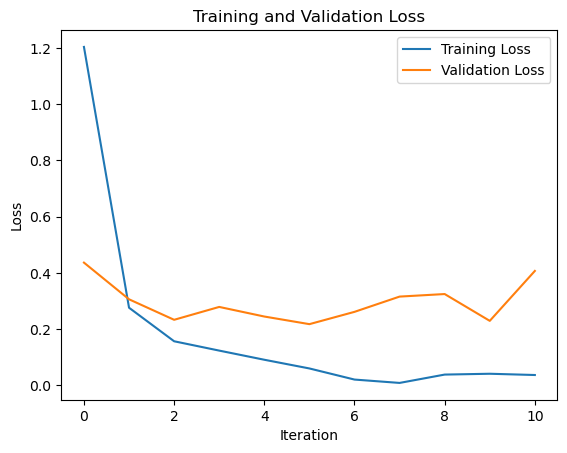

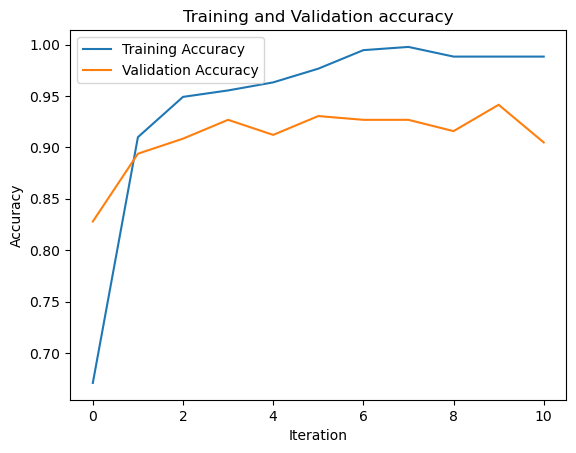

In [12]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()




plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
